In [3]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h3> Introduction </h3>
From Quandl we can download the data for different bitcoin markets:
https://www.quandl.com/data/BCHAIN/MKPRU-Bitcoin-Market-Price-USD

In [4]:
df = quandl.get('BCHARTS/KRAKENUSD', returns="pandas")

inspecting the different datatypes in the dataframe

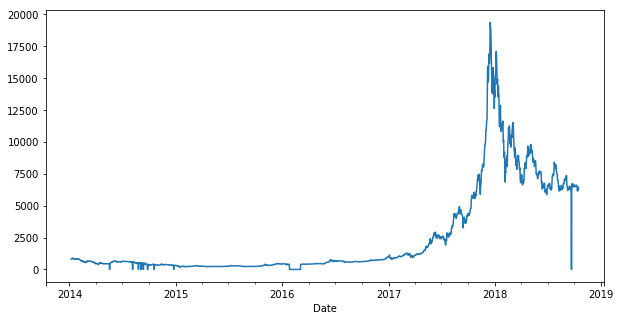

In [6]:
df['Close'].plot(figsize=(10,5));

There are a few notable down-spikes, particularly in late 2014 and early 2016. These spikes are specific to the Kraken dataset, and we obviously don't want them to be reflected in our overall pricing analysis.
<b>Let's remove the values where the Bitcoin is zero</b>

In [7]:
idx = df['Close']==0

In [8]:
print('There are ',sum(idx), ' such observations in the dataset')

There are  49  such observations in the dataset


In [9]:
df.drop(df.loc[idx].index,axis=0,inplace=True)

In [10]:
idx = df['Close']==0
print('Check: There are ',sum(idx), ' such observations in the dataset')

Check: There are  0  such observations in the dataset


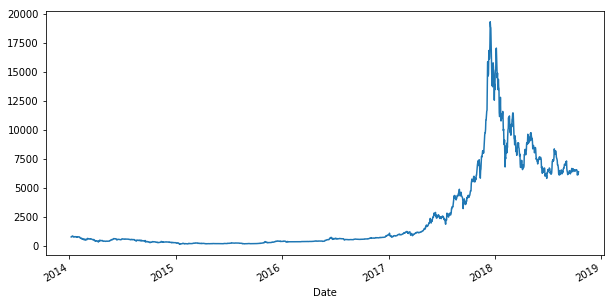

In [11]:
df['Close'].plot(figsize=(10,5));

<h3>Pulling different Exchanges together in one single dataframe </h3>


In [12]:
exchanges = ['COINBASE','BITSTAMP','ITBIT','KRAKEN']


In [13]:
exchange_data = dict()

for exchange in exchanges:
    exchange_code = 'BCHARTS/'+exchange+'USD'
    df_exchange = quandl.get(exchange_code,returns="pandas")
    exchange_data[exchange] = df_exchange

The results of the 4 different exchanges are stored in a dictionary :


In [14]:
exchange_data.keys()

dict_keys(['COINBASE', 'BITSTAMP', 'ITBIT', 'KRAKEN'])

In [15]:
exchange_data['COINBASE'].head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2015-02-04,228.77,230.25,221.85,227.11,3344.120783,7.578076e+05,226.608934
2015-05-11,241.59,245.49,239.50,242.86,6176.481242,1.498052e+06,242.541273
2015-05-12,242.74,243.40,240.37,242.03,6322.571412,1.531046e+06,242.155569
2015-05-13,242.04,244.13,235.54,236.32,10028.946883,2.424123e+06,241.712609
2015-05-14,236.93,240.00,232.61,237.46,10365.968041,2.462002e+06,237.508205


Examine the columns in the DataaFrame

In [16]:
for d in exchange_data.keys():
    print(d)
    print(exchange_data[d].columns)

COINBASE
Index(['Open', 'High', 'Low', 'Close', 'Volume (BTC)', 'Volume (Currency)',
       'Weighted Price'],
      dtype='object')
BITSTAMP
Index(['Open', 'High', 'Low', 'Close', 'Volume (BTC)', 'Volume (Currency)',
       'Weighted Price'],
      dtype='object')
ITBIT
Index(['Open', 'High', 'Low', 'Close', 'Volume (BTC)', 'Volume (Currency)',
       'Weighted Price'],
      dtype='object')
KRAKEN
Index(['Open', 'High', 'Low', 'Close', 'Volume (BTC)', 'Volume (Currency)',
       'Weighted Price'],
      dtype='object')


Put these together in one dataframe

In [17]:
df = pd.DataFrame()
for d in exchange_data.keys():
    df = pd.concat([df,exchange_data[d]['Close']],axis=1)


In [18]:
df.columns = exchanges

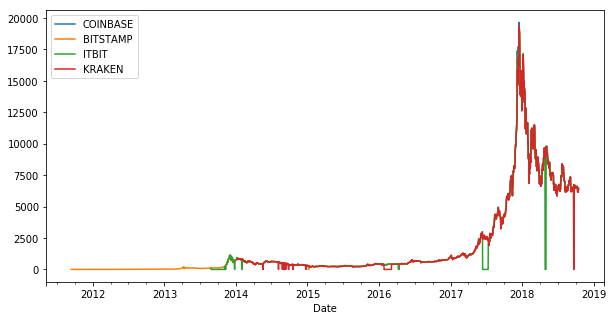

In [19]:
df.plot(figsize=(10,5))